In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas

pandas.__version__

'2.3.2'

In [3]:
import geopandas

geopandas.__version__

'1.1.1'

In [4]:
import pandas as pd
import geopandas as gpd

In [ ]:
data = {
    "Name": ["New York City", "São Paulo", "Tokyo", "Lagos", "Sydney"],
    "Population": [8419600, 12325232, 13929286, 15000000, 53121631],
    "Latitude": [40.7128, -23.5505, 35.6895, 6.5244, -33.86881],
    "Longitude": [-74.0060, -46.6333, 139.6917, 3.3792, 151.2093]    
}

In [8]:
type(data)

dict

In [9]:
data["Name"]

['New York City', 'São Paulo', 'Tokyo', 'Lagos', 'Sydney']

In [10]:
type(data["Name"])

list

In [11]:
cities_df = pd.DataFrame(data)

In [12]:
cities_df

,Name,Population,Latitude,Longitude
0,New York City,8419600,40.71280,-74.0060
1,São Paulo,12325232,-23.55050,-46.6333
2,Tokyo,13929286,35.68950,139.6917
3,Lagos,15000000,6.52440,3.3792
4,Sydney,53121631,-33.86881,151.2093


In [21]:
cities_df[['Name', 'Population']]

# cities_df['Name']

,Name,Population
0,New York City,8419600
1,São Paulo,12325232
2,Tokyo,13929286
3,Lagos,15000000
4,Sydney,53121631


In [17]:
type(cities_df)

pandas.core.frame.DataFrame

In [22]:
gdf = gpd.GeoDataFrame(
    cities_df,
    geometry=gpd.points_from_xy(
        cities_df['Longitude'],
        cities_df['Latitude']
    )
)

In [23]:
gdf

,Name,Population,Latitude,Longitude,geometry
0,New York City,8419600,40.71280,-74.0060,POINT (-74.006 40.7128)
1,São Paulo,12325232,-23.55050,-46.6333,POINT (-46.6333 -23.5505)
2,Tokyo,13929286,35.68950,139.6917,POINT (139.6917 35.6895)
3,Lagos,15000000,6.52440,3.3792,POINT (3.3792 6.5244)
4,Sydney,53121631,-33.86881,151.2093,POINT (151.2093 -33.86881)


In [24]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        5 non-null      object  
 1   Population  5 non-null      int64   
 2   Latitude    5 non-null      float64 
 3   Longitude   5 non-null      float64 
 4   geometry    5 non-null      geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 332.0+ bytes


In [25]:
gdf['geometry']

0       POINT (-74.006 40.7128)
1     POINT (-46.6333 -23.5505)
2      POINT (139.6917 35.6895)
3         POINT (3.3792 6.5244)
4    POINT (151.2093 -33.86881)
Name: geometry, dtype: geometry

In [26]:
gdf.geometry

0       POINT (-74.006 40.7128)
1     POINT (-46.6333 -23.5505)
2      POINT (139.6917 35.6895)
3         POINT (3.3792 6.5244)
4    POINT (151.2093 -33.86881)
Name: geometry, dtype: geometry

In [27]:
type(gdf.geometry)

geopandas.geoseries.GeoSeries

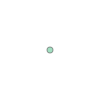

In [28]:
gdf['geometry'][0]

In [29]:
type(gdf['geometry'][0])

shapely.geometry.point.Point

In [30]:
import shapely

## Polygons

In [31]:
wisconsin = 'POLYGON((-90.6303 42.5116,-87.0241 42.4954,-87.1477 43.3721,-87.1230 43.6838,-86.9911 44.1694, -86.8579 44.4828))'

In [32]:
data = {
    "Name" : ["Wisconsin"],
    "Population": [5911000],
    "geometry": [wisconsin]
}

In [33]:
gdf = gpd.GeoDataFrame(data)

In [34]:
gdf.head()

,Name,Population,geometry
0,Wisconsin,5911000,"POLYGON((-90.6303 42.5116,-87.0241 42.4954,-87..."


In [36]:
gdf['geometry'][0]

'POLYGON((-90.6303 42.5116,-87.0241 42.4954,-87.1477 43.3721,-87.1230 43.6838,-86.9911 44.1694, -86.8579 44.4828))'

In [38]:
gdf = gpd.GeoDataFrame(
    data,
    geometry=gpd.GeoSeries.from_wkt(data['geometry'])
)

GEOSException: IllegalArgumentException: Points of LinearRing do not form a closed linestring